In [2]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
df = pd.read_csv(r"C:\Users\Rengarajan\DataScience\ML_Algorithms\Linear_Regression\height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

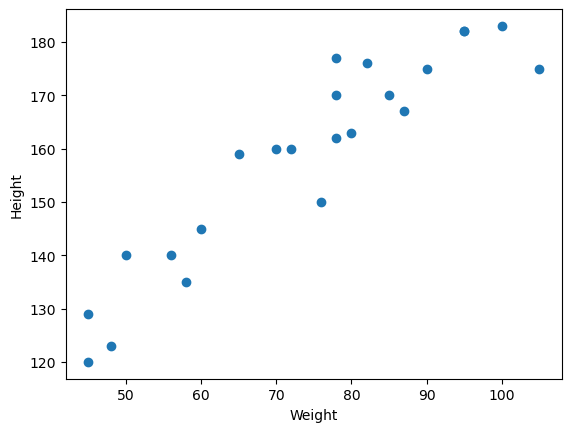

In [4]:
#scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

<Axes: xlabel='Weight', ylabel='Height'>

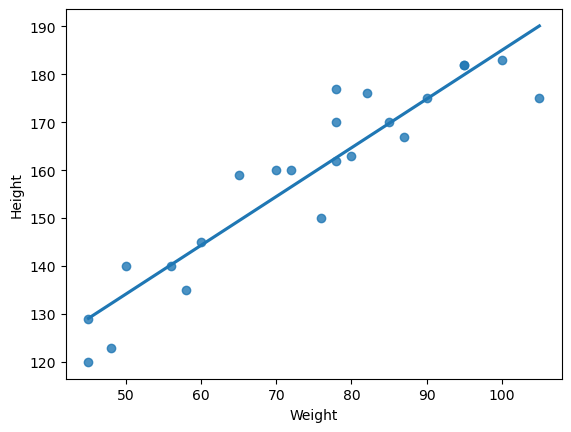

In [5]:
#Draw plot and line
sns.regplot(x='Weight',y='Height',ci=None,data=df)

In [6]:
#check the corelation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


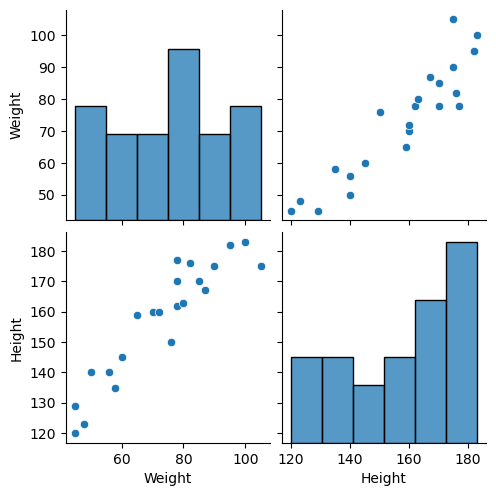

In [7]:
#visualizing relationship between two variables
sns.pairplot(df)

In [8]:
#Independent and dependent features
X=df[['Weight']]  # independent features should be a dataframe or 2 dimesnionalarray
y=df['Height']    # this variiable can be in series or 1d array

In [9]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

In [10]:
X_train.shape

(17, 1)

In [11]:
X_test.shape

(6, 1)

In [12]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
#train a model
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1)

In [15]:
model.fit(X_train_scaled,y_train)

LinearRegression(n_jobs=-1)

In [16]:
#slope
model.coef_ 

array([17.2982057])

In [17]:
#intercept
model.intercept_

156.47058823529412

In [18]:
print("co-efficient or slope:", model.coef_) #one unit movement in weight axis, 17.29unit movement in height axis
print("intercept:", model.intercept_)

co-efficient or slope: [17.2982057]
intercept: 156.47058823529412


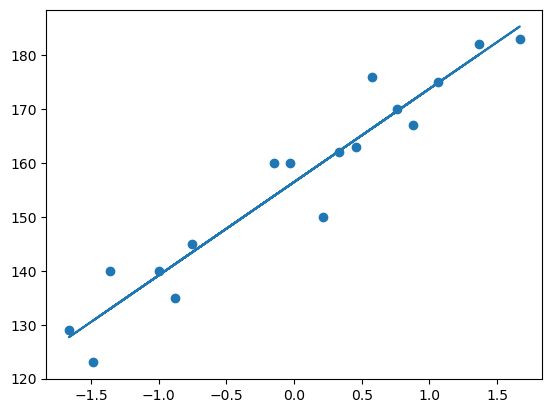

In [19]:
## plot Training data plot best fit line
plt.scatter(X_train_scaled,y_train)
plt.plot(X_train_scaled,model.predict(X_train_scaled))

In [20]:
#Prediction for test data
y_pred=model.predict(X_test_scaled)
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [21]:
#Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.665125886795005
10.716374991212605


In [22]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.7360826717981276


In [23]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

In [24]:
model.predict([[0.7]])

array([168.57933223])

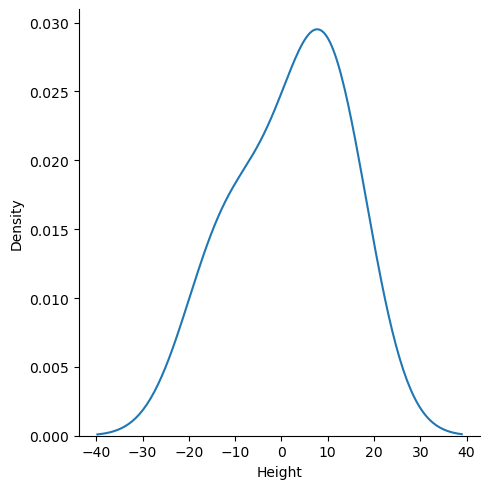

In [25]:
sns.displot(y_test-y_pred, kind='kde')